# Image Classification using Neural Network (NN) with Scikit-Learn

In [1]:
!pip install opencv-python imutils scikit-learn

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import os
import random

import cv2
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

## Loading Images

In [3]:
%matplotlib inline

In [4]:
image_paths = list(paths.list_images('datasets/animals'))

In [5]:
print(image_paths)

['datasets/animals/dogs/dogs_00977.jpg', 'datasets/animals/dogs/dogs_00963.jpg', 'datasets/animals/dogs/dogs_00793.jpg', 'datasets/animals/dogs/dogs_00787.jpg', 'datasets/animals/dogs/dogs_00778.jpg', 'datasets/animals/dogs/dogs_00036.jpg', 'datasets/animals/dogs/dogs_00988.jpg', 'datasets/animals/dogs/dogs_00750.jpg', 'datasets/animals/dogs/dogs_00744.jpg', 'datasets/animals/dogs/dogs_00022.jpg', 'datasets/animals/dogs/dogs_00591.jpg', 'datasets/animals/dogs/dogs_00585.jpg', 'datasets/animals/dogs/dogs_00208.jpg', 'datasets/animals/dogs/dogs_00552.jpg', 'datasets/animals/dogs/dogs_00234.jpg', 'datasets/animals/dogs/dogs_00220.jpg', 'datasets/animals/dogs/dogs_00546.jpg', 'datasets/animals/dogs/dogs_00383.jpg', 'datasets/animals/dogs/dogs_00397.jpg', 'datasets/animals/dogs/dogs_00368.jpg', 'datasets/animals/dogs/dogs_00426.jpg', 'datasets/animals/dogs/dogs_00340.jpg', 'datasets/animals/dogs/dogs_00354.jpg', 'datasets/animals/dogs/dogs_00432.jpg', 'datasets/animals/dogs/dogs_00803.jpg',

In [6]:
random.seed(42)
random.shuffle(image_paths)

In [7]:
print(image_paths)

['datasets/animals/panda/panda_00553.jpg', 'datasets/animals/cats/cats_00941.jpg', 'datasets/animals/panda/panda_00642.jpg', 'datasets/animals/dogs/dogs_00168.jpg', 'datasets/animals/dogs/dogs_00650.jpg', 'datasets/animals/dogs/dogs_00471.jpg', 'datasets/animals/cats/cats_00806.jpg', 'datasets/animals/dogs/dogs_00833.jpg', 'datasets/animals/panda/panda_00545.jpg', 'datasets/animals/cats/cats_00592.jpg', 'datasets/animals/cats/cats_00534.jpg', 'datasets/animals/panda/panda_00061.jpg', 'datasets/animals/panda/panda_00084.jpg', 'datasets/animals/cats/cats_00952.jpg', 'datasets/animals/dogs/dogs_00839.jpg', 'datasets/animals/panda/panda_00503.jpg', 'datasets/animals/dogs/dogs_00128.jpg', 'datasets/animals/panda/panda_00763.jpg', 'datasets/animals/dogs/dogs_00920.jpg', 'datasets/animals/dogs/dogs_00816.jpg', 'datasets/animals/dogs/dogs_00004.jpg', 'datasets/animals/panda/panda_00265.jpg', 'datasets/animals/panda/panda_00066.jpg', 'datasets/animals/panda/panda_00470.jpg', 'datasets/animals/d

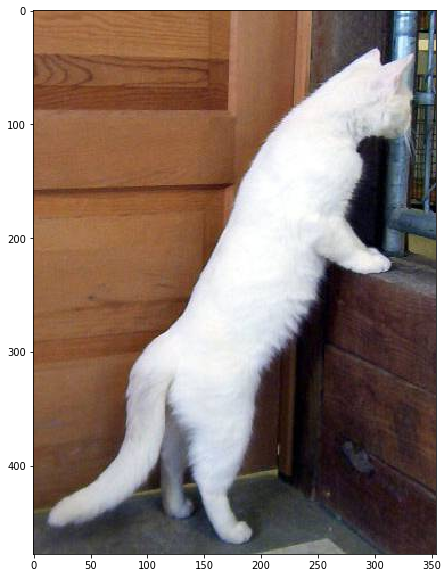

In [8]:
image = cv2.imread(image_paths[2500])

plt.figure(figsize=(10, 10))
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image);

In [9]:
data = []
labels = []

**Note:** Machine learning models take a *fixed size input*.

In [10]:
for image_path in image_paths:
    image = cv2.imread(image_path)
    label = image_path.split(os.path.sep)[-2]
    image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)
    data.append(image)
    labels.append(label)

In [11]:
data = np.array(data)
labels = np.array(labels)

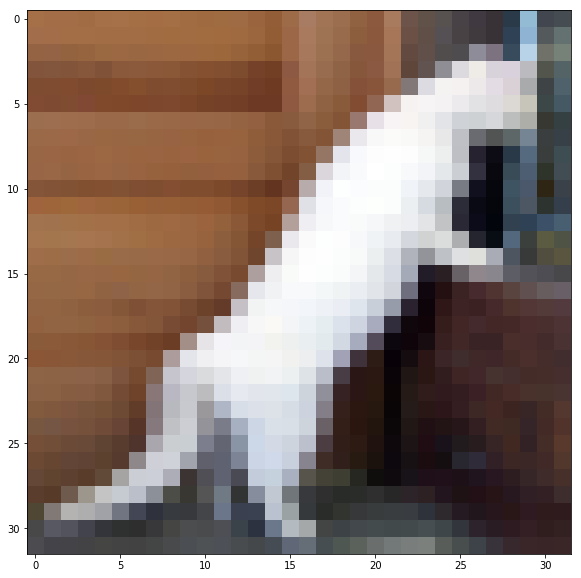

In [12]:
plt.figure(figsize=(10, 10))
rgb_image = cv2.cvtColor(data[2500], cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image);

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [14]:
data.shape

(3000, 32, 32, 3)

In [15]:
data = data.reshape((data.shape[0], 3072))

Normalize images to the range [0, 1].

In [16]:
data = data.astype('float') / 255.0

In [17]:
data.shape

(3000, 3072)

In [18]:
le = LabelEncoder()

In [19]:
labels = le.fit_transform(labels)

In [20]:
labels

array([2, 0, 2, ..., 1, 1, 2])

In [21]:
le.classes_

array(['cats', 'dogs', 'panda'], dtype='<U5')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=30)

## Building a NN Model

In [23]:
nn = MLPClassifier()

In [24]:
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [25]:
y_pred = nn.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

             precision    recall  f1-score   support

       cats       0.60      0.59      0.59       242
       dogs       0.53      0.63      0.58       252
      panda       0.85      0.71      0.78       256

avg / total       0.66      0.64      0.65       750

